# Rotation of axis labels

The `angle` parameter in `element_text()` function allows to rotate the text. This functionality is currently available to rotate axis labels (i.e. for the `axis_text, axis_text_x, axis_text_y` parameters in a `theme()`).

1. [Default axis labels layout](#1.-Default-Axis-Labels-Layout)  


2. [Layout labels for the discrete axis](#2.-Layout-labels-for-the-discrete-axis)  

 2.1. [Horizontal axis](#2.1.-Horizontal-axis)

 2.2. [Vertical axis](#2.2.-Vertical-axis)

 
3. [Layout labels for continuous axis](#3.-Layout-labels-for-continuous-axis)

 3.1. [Horizontal axis](#3.1.-Horizontal-axis)

 3.2. [Vertical axis](#3.2.-Vertical-axis)


4. [Lets choose the best options to place axis labels](#4.-Lets-choose-the-best-options-to-place-axis-labels)

In [1]:
import pandas as pd

from lets_plot import *


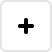
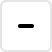
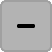
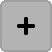
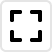
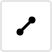
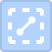
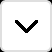
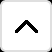
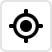

In [2]:
LetsPlot.setup_html()
LetsPlot.set_theme(theme_light())

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/midwest.csv')
df.head(3)

,Unnamed: 0,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,...,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
0,1,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,...,19.631392,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR
1,2,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,...,11.243308,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR
2,3,563,BOND,IL,0.022,14991,681.409091,14477,429,35,...,17.033819,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR


In [4]:
df['state'].unique()

array(['IL', 'IN', 'MI', 'OH', 'WI'], dtype=object)

In [5]:
df['state'] = df['state'].map(
    {'IL': 'Illinois', 'IN':'Indiana', 'MI':'Michigan', 'OH': 'Ohio', 'WI' : 'Wisconsin'}
)

In [6]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()


angles = [0, 45, 90, -30]

highlight_axis_labels = theme(
    text=element_text(color='gray', size=13), 
    axis_text=element_text(color='blue')
)
    
def plot_with_text_angles(base_plot, text_elem_name):
    plots = []   
    for angle in angles:
        plots.append(
            base_plot + ggtitle("angle={0}".format(angle)) + theme(**{text_elem_name: element_text(angle=angle)})
        )
    return plot_matrix(plots)

#### 1. Default Axis Labels Layout

In [7]:
p = ggplot(df) + geom_jitter(aes('state', 'poptotal'), color='light_gray')
p

#### 2. Layout labels for the discrete axis

##### 2.1. Horizontal axis

In [8]:
plot_with_text_angles(
    p + theme(axis_text_y='blank') + highlight_axis_labels, 
    'axis_text_x'
)

In [9]:
# Change axis position

plot_with_text_angles(
    p + theme(axis_text_y='blank') + highlight_axis_labels + scale_x_discrete(position="top"), 
    'axis_text_x'
)

##### 2.2. Vertical axis

In [10]:
plot_with_text_angles(
    p + theme(axis_text_y='blank') + highlight_axis_labels + coord_flip(),
    'axis_text_x'
)

In [11]:
# Change axis position

plot_with_text_angles(
    p + theme(axis_text_y='blank') + highlight_axis_labels + scale_x_discrete(position="top") + coord_flip(),
    'axis_text_x'
)

#### 3. Layout labels for continuous axis

The number of labels on the axis varies depending on how many it can fit.

##### 3.1. Horizontal axis

In [12]:
plot_with_text_angles(
    p + theme(axis_text_x='blank') + highlight_axis_labels + coord_flip(),
    'axis_text_y'
)

In [13]:
# Change axis position

plot_with_text_angles(
    p + theme(axis_text_x='blank') + highlight_axis_labels + coord_flip() + scale_y_continuous(position='right'),
    'axis_text_y'
)

##### 3.2. Vertical axis

In [14]:
plot_with_text_angles(
    p + theme(axis_text_x='blank') + highlight_axis_labels,
    'axis_text_y'
)

In [15]:
# Change axis position

plot_with_text_angles(
    p + theme(axis_text_x='blank') + highlight_axis_labels + scale_y_log10(position='right'), 
    'axis_text_y'
)

#### 4. Lets choose the best options to place axis labels

In [16]:
ggplot(df) + \
    geom_jitter(aes('state', 'poptotal', color='state')) + \
    scale_y_log10() + \
    theme(axis_text_x=element_text(angle=15), axis_text_y=element_text(angle=90))